In [1]:
import pandas as pd
df= pd.read_csv('customer_shopping_behavior.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   str    
 3   Item Purchased          3900 non-null   str    
 4   Category                3900 non-null   str    
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   str    
 7   Size                    3900 non-null   str    
 8   Color                   3900 non-null   str    
 9   Season                  3900 non-null   str    
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   str    
 12  Shipping Type           3900 non-null   str    
 13  Discount Applied        3900 non-null   str    
 14  Promo Code Used         3900 non-null   str    
 15

In [3]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [4]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [5]:
df['Review Rating']=df.groupby('Category')['Review Rating'].transform( lambda x:x.fillna(x.median()))
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df=df.rename(columns={'purchase_amount_(usd)':'purchase amount'})
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='str')

In [16]:
#create purchase frequency days
frequency_mapping={
    'Fortnightly':14,
     'Weekly':7,
     'Monthly':30,
      'Quarterly':90,
      'Bi-weakly':14,
      'Annually':365,
      'Every 3 months':90

}
df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

    

In [17]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14.0,Fortnightly
1,14.0,Fortnightly
2,7.0,Weekly
3,7.0,Weekly
4,365.0,Annually
5,7.0,Weekly
6,90.0,Quarterly
7,7.0,Weekly
8,365.0,Annually
9,90.0,Quarterly


In [18]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [23]:
(df['discount_applied']==df['promo_code_used']).all()

np.True_

In [24]:
df=df.drop('promo_code_used',axis=1)
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'purchase_frequency_days'],
      dtype='str')

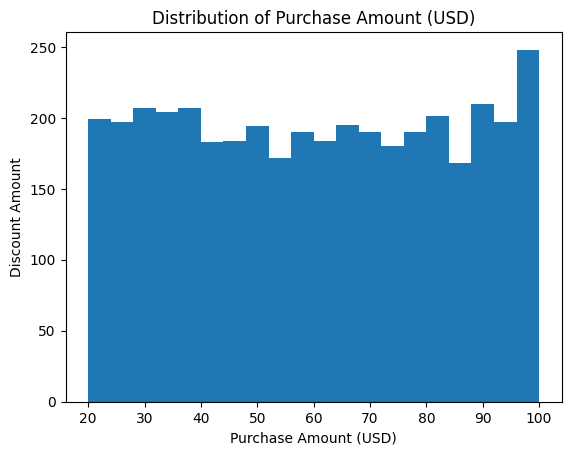

In [14]:
plt.figure()
plt.hist(df['Purchase Amount (USD)'], bins=20)
plt.title("Distribution of Purchase Amount (USD)")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Discount Amount")
plt.show()


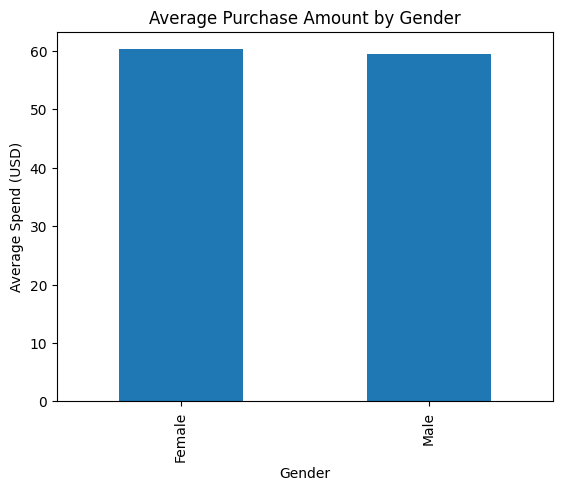

In [15]:
plt.figure()
df.groupby('Gender')['Purchase Amount (USD)'].mean().plot(kind='bar')
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spend (USD)")
plt.show()


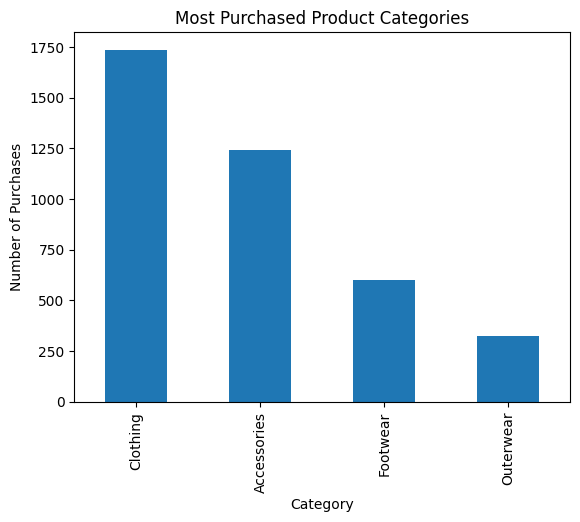

In [16]:
plt.figure()
df['Category'].value_counts().plot(kind='bar')
plt.title("Most Purchased Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.show()


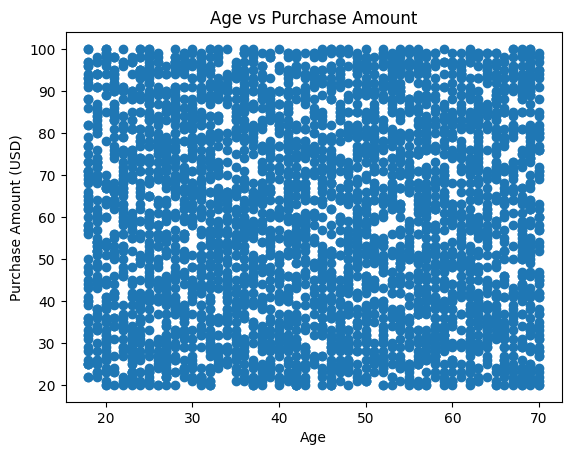

In [17]:
plt.figure()
plt.scatter(df['Age'], df['Purchase Amount (USD)'])
plt.title("Age vs Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()


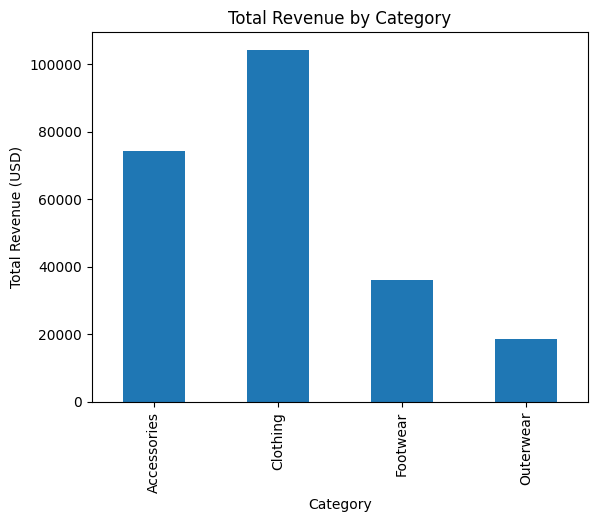

In [18]:
plt.figure()
df.groupby('Category')['Purchase Amount (USD)'].sum().plot(kind='bar')
plt.title("Total Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.show()


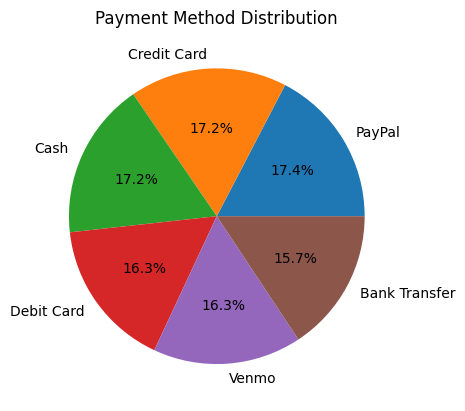

In [19]:
plt.figure()
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


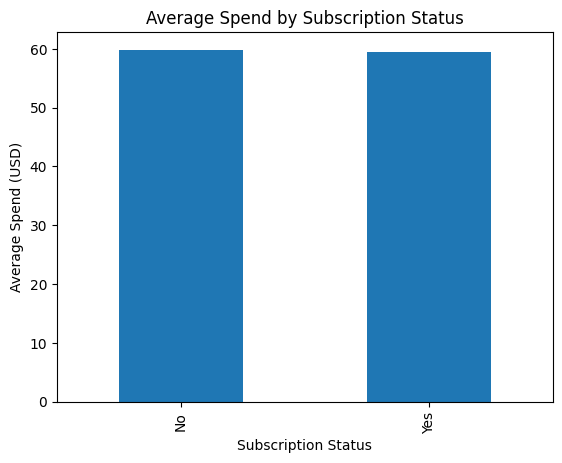

In [20]:
plt.figure()
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean().plot(kind='bar')
plt.title("Average Spend by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Average Spend (USD)")
plt.show()


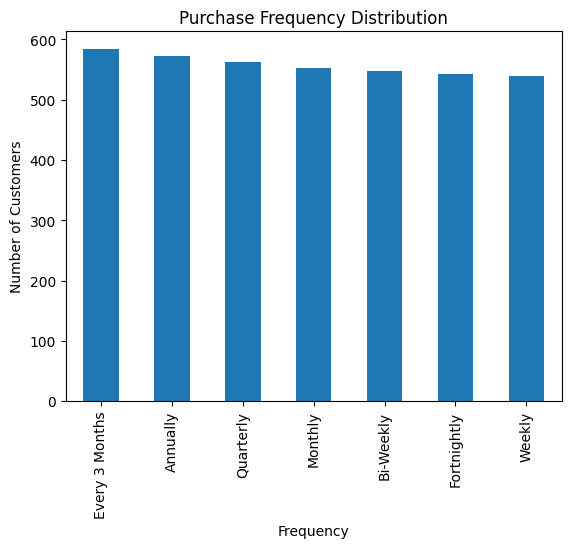

In [21]:
plt.figure()
df['Frequency of Purchases'].value_counts().plot(kind='bar')
plt.title("Purchase Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Number of Customers")
plt.show()


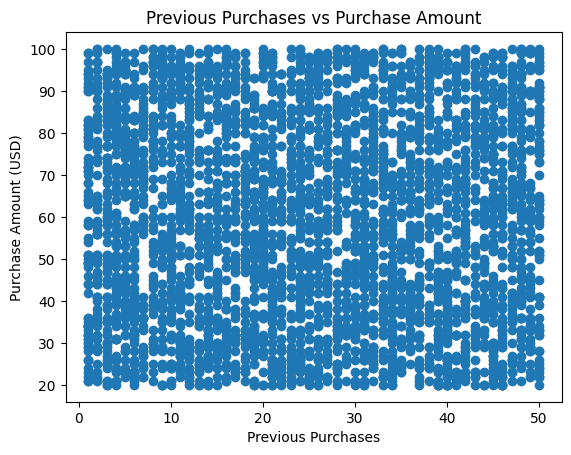

In [22]:
plt.figure()
plt.scatter(df['Previous Purchases'], df['Purchase Amount (USD)'])
plt.title("Previous Purchases vs Purchase Amount")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.show()


In [23]:
username = "postgres"
password = "abdul06"
host = "localhost"
port = 5432
database = "customer_shopping"

import pandas as pd
from sqlalchemy import create_engine

# Step 0: Create or load your DataFrame
df = pd.read_csv("customer_shopping_behavior.csv")   # or however you get your data

# Step 1: Connect to PostgreSQL
engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)

# Step 2: Load the DataFrame into PostgreSQL
table_name = "customer"

df.to_sql(
    name=table_name,
    con=engine,
    if_exists="replace",
    index=False
)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")



Data successfully loaded into table 'customer' in database 'customer_shopping'.
